In [1]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# Datos Atípicos
Un valor atípico es una observación que se aleja demasiado de la moda; esta muy lejos de la tendencia principal del resto de los datos. Pueden ser causados por errores en la recolección de datos o medidas inusuales. Generalmente se recomienda eliminarlos del conjunto de datos. Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.

In [3]:
total=pd.read_excel("TOTAL.xlsx",index_col=0)
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOSMUJ,SOCIOSHOM,PERMANENTEMUJ,PERMANENTEHOM,APRENDIZMUJ,APRENDIZHOM,...,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,PERMANENTE,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
EMPRESA,,,,,,,,,,,,,,,,,,,,,
145973,145898,11,1810,2008,0,0,0,2,0,0,...,3525900,3525900,0,0,2,912761,2602400,0,0,3460300
145979,145904,11,1810,2008,1,1,5,2,0,0,...,296411,296411,9406,0,7,122106,102941,0,0,296411
145987,145912,11,1810,2008,0,0,0,0,0,0,...,1594496,1594496,3200,46,0,366562,867491,0,194621,1597520
145988,145913,11,1741,2008,0,1,0,0,0,0,...,166200,166200,-2000,0,0,92868,26720,0,0,231480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987525,987525,8,139,2016,0,0,0,0,4,0,...,11257778,11907721,25885,84,0,3431145,4925968,0,654653,11002090
987529,987529,8,139,2016,0,0,7,11,0,1,...,1554335,1566400,0,0,18,794639,279709,244803,0,1657388
987530,987530,8,139,2016,0,0,33,32,2,1,...,86282095,85785462,262072,2,65,22787632,46732723,2530882,49583775,85991402
987533,987533,8,139,2016,0,0,5,5,1,1,...,7892838,7892838,0,36,10,3682753,4038309,0,0,8600884


En esta sección se realiza un gráfico de cajas de las variables de estudio utilizando la función boxplot()

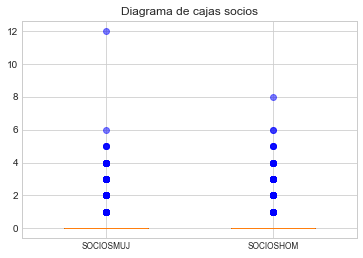

In [7]:
k=plt.boxplot([total.SOCIOSMUJ,total.SOCIOSHOM],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["SOCIOSMUJ","SOCIOSHOM"],size="small")
plt.title("Diagrama de cajas socios");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas socios.png")

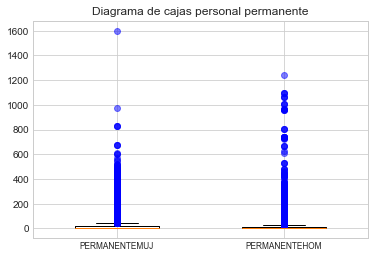

In [8]:
k=plt.boxplot([total.PERMANENTEMUJ,total.PERMANENTEHOM],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["PERMANENTEMUJ","PERMANENTEHOM"],size="small")
plt.title("Diagrama de cajas personal permanente");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas personal permanente.png")

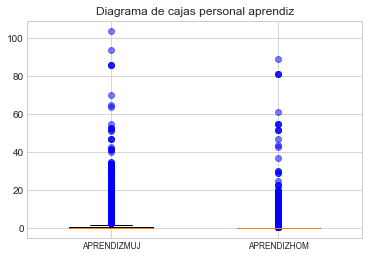

In [9]:
k=plt.boxplot([total.APRENDIZMUJ,total.APRENDIZHOM],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["APRENDIZMUJ","APRENDIZHOM"],size="small")
plt.title("Diagrama de cajas personal aprendiz");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas personal aprendiz.png")

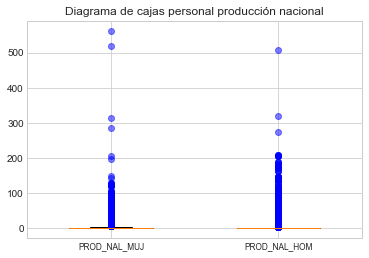

In [10]:
k=plt.boxplot([total.PROD_NAL_MUJ,total.PROD_NAL_HOM],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["PROD_NAL_MUJ","PROD_NAL_HOM"],size="small")
plt.title("Diagrama de cajas personal producción nacional");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas personal producción nacional.png")

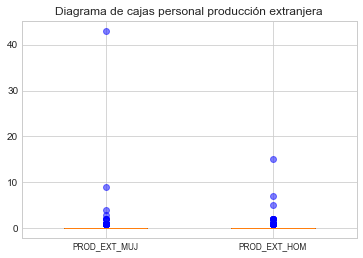

In [11]:
k=plt.boxplot([total.PROD_EXT_MUJ,total.PROD_EXT_HOM],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["PROD_EXT_MUJ","PROD_EXT_HOM"],size="small")
plt.title("Diagrama de cajas personal producción extranjera");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas personal producción extranjera.png")

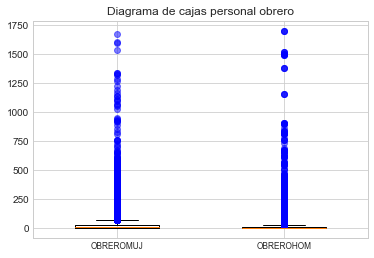

In [12]:
k=plt.boxplot([total.OBREROMUJ,total.OBREROHOM],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["OBREROMUJ","OBREROHOM"],size="small")
plt.title("Diagrama de cajas personal obrero");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas personal obrero.png")

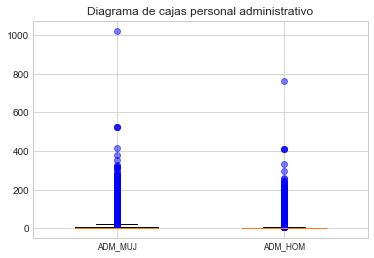

In [13]:
k=plt.boxplot([total.ADM_MUJ,total.ADM_HOM],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["ADM_MUJ","ADM_HOM"],size="small")
plt.title("Diagrama de cajas personal administrativo");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas personal administrativo.png")

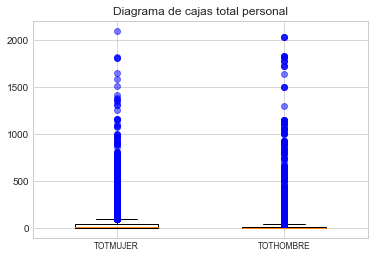

In [14]:
k=plt.boxplot([total.TOTMUJER,total.TOTHOMBRE],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["TOTMUJER","TOTHOMBRE"],size="small")
plt.title("Diagrama de cajas total personal");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas total personal.png")

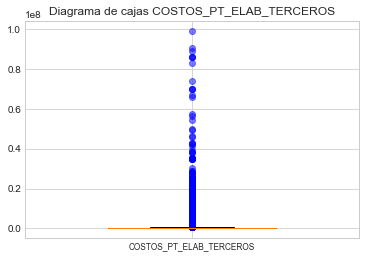

In [15]:
k=plt.boxplot([total.COSTOS_PT_ELAB_TERCEROS],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1],["COSTOS_PT_ELAB_TERCEROS"],size="small")
plt.title("Diagrama de cajas COSTOS_PT_ELAB_TERCEROS");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas COSTOS_PT_ELAB_TERCEROS.png")

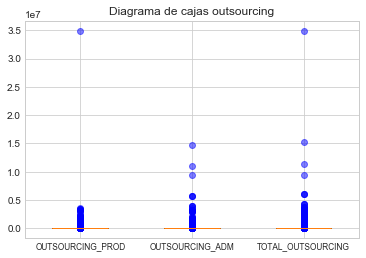

In [16]:
k=plt.boxplot([total.OUTSOURCING_PROD,total.OUTSOURCING_ADM,total.TOTAL_OUTSOURCING],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3],["OUTSOURCING_PROD","OUTSOURCING_ADM","TOTAL_OUTSOURCING"],size="small")
plt.title("Diagrama de cajas outsourcing");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas outsourcing.png")

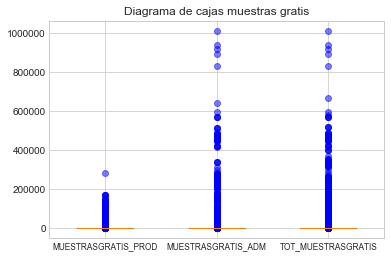

In [18]:
k=plt.boxplot([total.MUESTRASGRATIS_PROD,total.MUESTRASGRATIS_ADM,total.TOT_MUESTRASGRATIS],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3],["MUESTRASGRATIS_PROD","MUESTRASGRATIS_ADM","TOT_MUESTRASGRATIS"],size="small")
plt.title("Diagrama de cajas muestras gratis");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas muestras gratis.png")

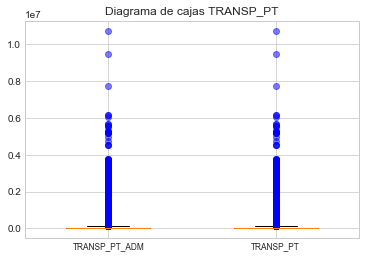

In [19]:
k=plt.boxplot([total.TRANSP_PT_ADM,total.TRANSP_PT],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["TRANSP_PT_ADM","TRANSP_PT"],size="small")
plt.title("Diagrama de cajas TRANSP_PT");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas TRANSP_PT.png")

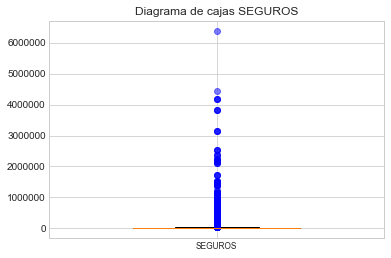

In [20]:
k=plt.boxplot([total.SEGUROS],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1],["SEGUROS"],size="small")
plt.title("Diagrama de cajas SEGUROS");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas SEGUROS.png")

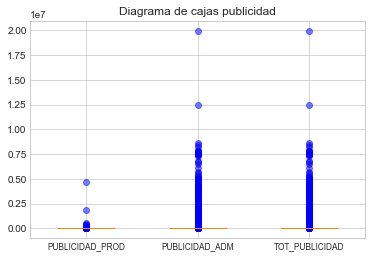

In [21]:
k=plt.boxplot([total.PUBLICIDAD_PROD,total.PUBLICIDAD_ADM,total.TOT_PUBLICIDAD],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3],["PUBLICIDAD_PROD","PUBLICIDAD_ADM","TOT_PUBLICIDAD"],size="small")
plt.title("Diagrama de cajas publicidad");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas publicidad.png")

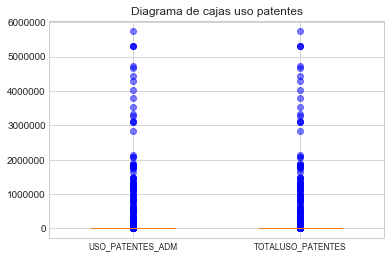

In [22]:
k=plt.boxplot([total.USO_PATENTES_ADM,total.TOTALUSO_PATENTES],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["USO_PATENTES_ADM","TOTALUSO_PATENTES"],size="small")
plt.title("Diagrama de cajas uso patentes");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas uso patentes.png")

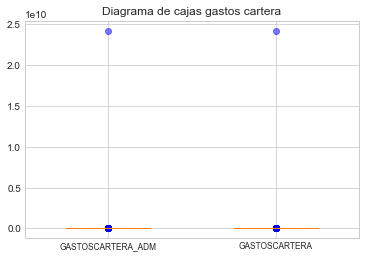

In [23]:
k=plt.boxplot([total.GASTOSCARTERA_ADM,total.GASTOSCARTERA],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["GASTOSCARTERA_ADM","GASTOSCARTERA"],size="small")
plt.title("Diagrama de cajas gastos cartera");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas gastos cartera.png")

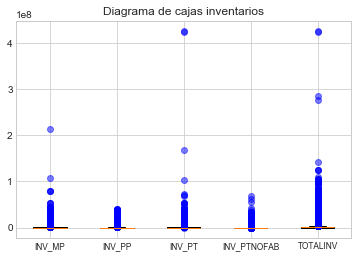

In [24]:
k=plt.boxplot([total.INV_MP,total.INV_PP,total.INV_PT,total.INV_PTNOFAB,total.TOTALINV],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3,4,5],["INV_MP","INV_PP","INV_PT","INV_PTNOFAB","TOTALINV"],size="small")
plt.title("Diagrama de cajas inventarios");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas inventarios.png")

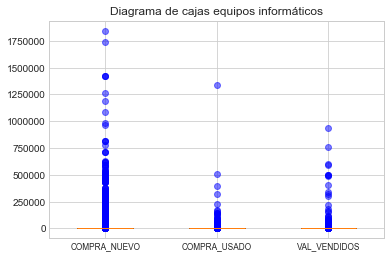

In [31]:
k=plt.boxplot([total.COMPRAEINFORMATICA_NUEVO,total.COMPRAEINFORMATICA_USADO,total.VAL_VENDIDOS_EINFORMATICA],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3],["COMPRA_NUEVO","COMPRA_USADO","VAL_VENDIDOS"],size="small")
plt.title("Diagrama de cajas equipos informáticos");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas equipos informaticos.png")

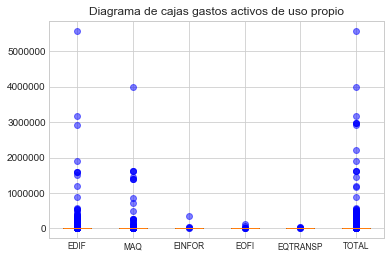

In [28]:
k=plt.boxplot([total.GASTOSEDIF_USOPROPIO,total.GASTOSMAQ_USOPROPIO,total.GASTOSEINFORMATICA_USOPROPIO,total.GASTOSEOFICINA_USOPROPIO,total.GASTOSEQTRANSP_USOPROPIO,total.TOTALGASTOS_USOPROPIO],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3,4,5,6],["EDIF","MAQ","EINFOR","EOFI","EQTRANSP","TOTAL"],size="small")
plt.title("Diagrama de cajas gastos activos de uso propio");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas gastos activos de uso propio.png")

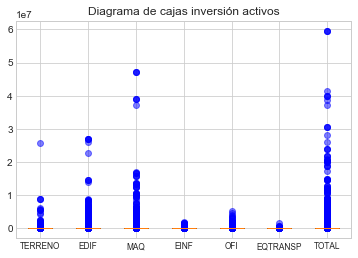

In [29]:
k=plt.boxplot([total.INVER_TERRENO,total.INVER_EDIF,total.INVER_MAQ,total.TOTALINV_EINFORMATICA,total.INVER_OFICINA,total.INVER_EQTRANSP,total.TOTALINVER],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3,4,5,6,7],["TERRENO","EDIF","MAQ","EINF","OFI","EQTRANSP","TOTAL"],size="small")
plt.title("Diagrama de cajas inversión activos");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas inversión activos.png")

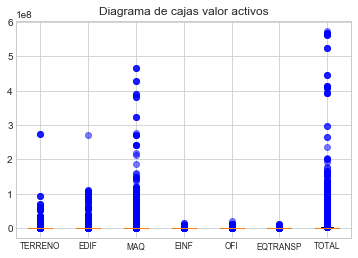

In [32]:
k=plt.boxplot([total.VAL_TERRENO,total.VAL_EDIF,total.VAL_MAQ,total.VAL_EINFORMATICA,total.VAL_OFICINA,total.VAL_EQTRANSP,total.VALORACTIVOS],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3,4,5,6,7],["TERRENO","EDIF","MAQ","EINF","OFI","EQTRANSP","TOTAL"],size="small")
plt.title("Diagrama de cajas valor activos");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas valor activos.png")

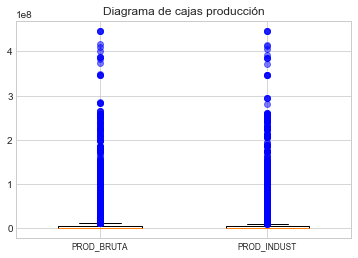

In [33]:
k=plt.boxplot([total.PROD_BRUTA,total.PROD_INDUST],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["PROD_BRUTA","PROD_INDUST"],size="small")
plt.title("Diagrama de cajas producción");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas producción.png")

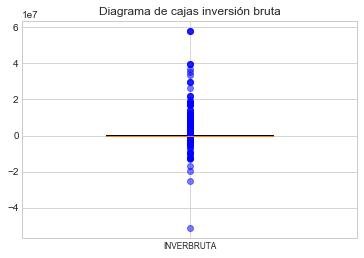

In [34]:
k=plt.boxplot([total.INVERBRUTA],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1],["INVERBRUTA"],size="small")
plt.title("Diagrama de cajas inversión bruta");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas inversión bruta.png")

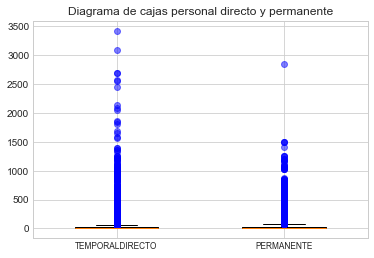

In [35]:
k=plt.boxplot([total.TEMPORALDIRECTO,total.PERMANENTE],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["TEMPORALDIRECTO","PERMANENTE"],size="small")
plt.title("Diagrama de cajas personal directo y permanente");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas personal directo y permanente.png")

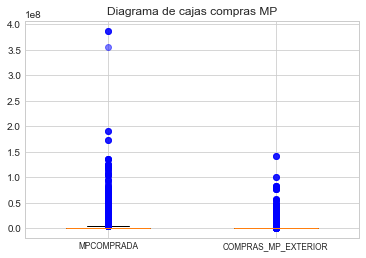

In [36]:
k=plt.boxplot([total.MPCOMPRADA,total.COMPRAS_MP_EXTERIOR],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2],["MPCOMPRADA","COMPRAS_MP_EXTERIOR"],size="small")
plt.title("Diagrama de cajas compras MP");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas personal compras MP.png")

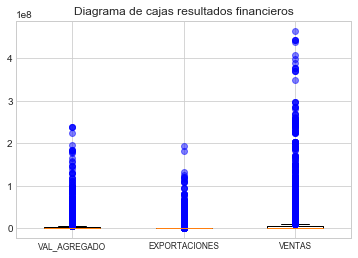

In [37]:
k=plt.boxplot([total.VAL_AGREGADO,total.EXPORTACIONES,total.VENTAS],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3],["VAL_AGREGADO","EXPORTACIONES","VENTAS"],size="small")
plt.title("Diagrama de cajas resultados financieros");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

plt.savefig("Diagrama de cajas resultados financieros.png")